Number of unique classes: 28
Class distribution:
 0
1     480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
15    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
28    480
Name: count, dtype: int64


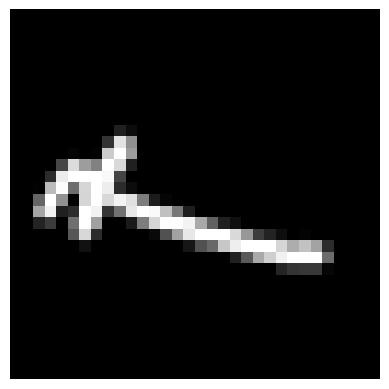

أ


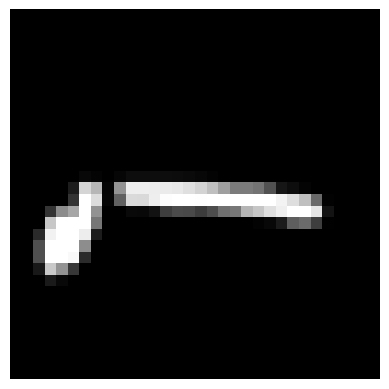

أ


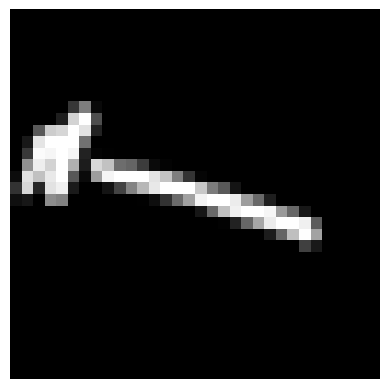

أ


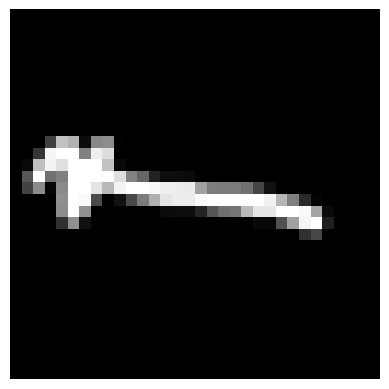

أ


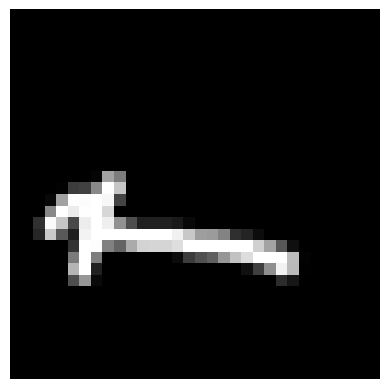

أ


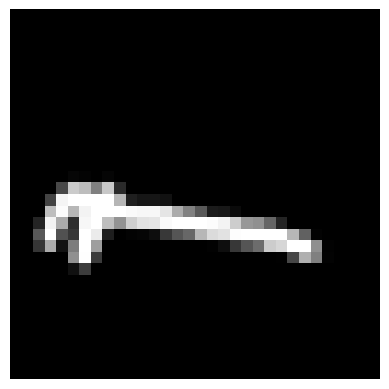

أ


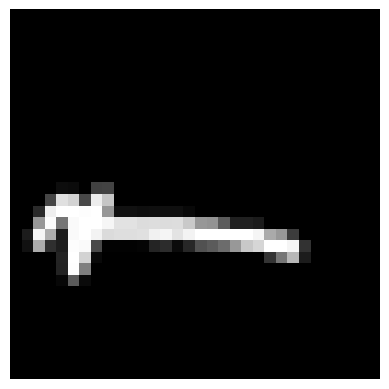

أ


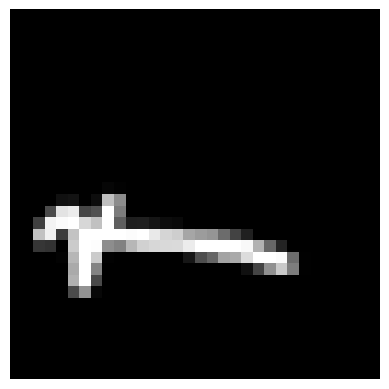

أ


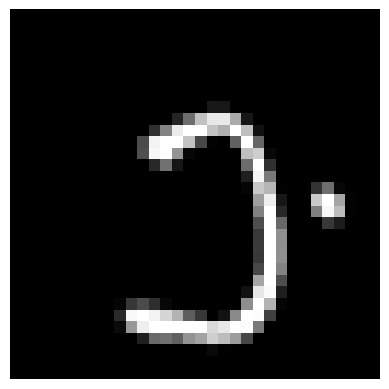

ب


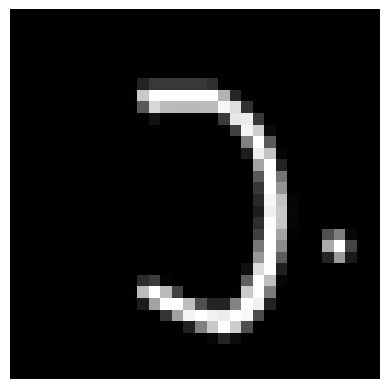

ب


C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

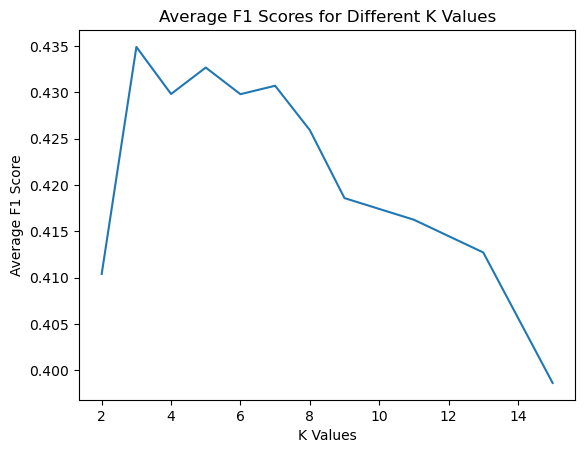

Best K value: 3


C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


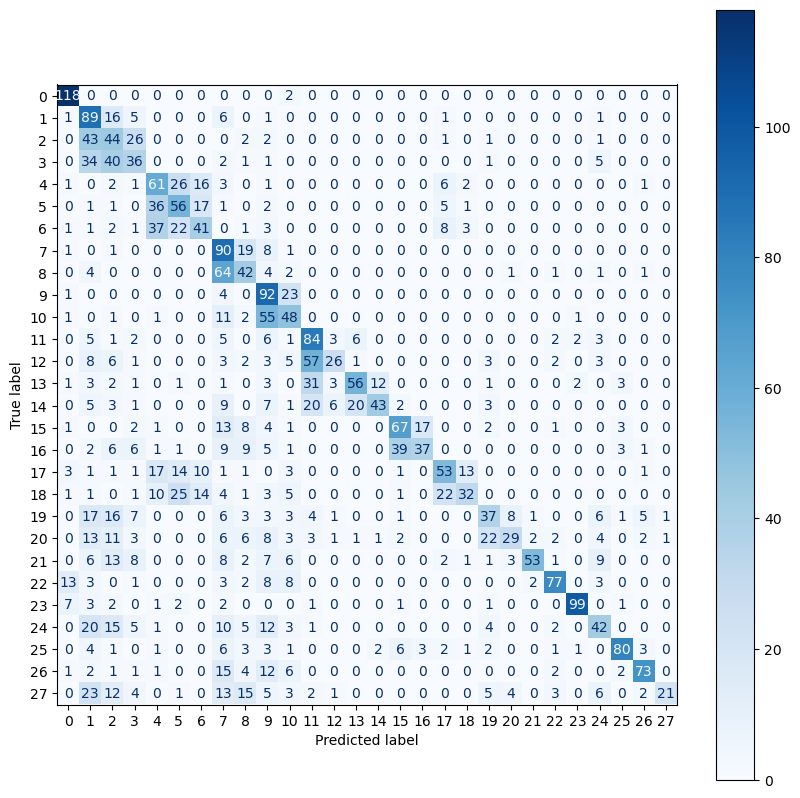

Average F1 Score (Testing Set): 0.483239282836707
Confusion Matrix (Testing Set):
 [[118   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  1  89  16   5   0   0   0   6   0   1   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   1   0   0   0]
 [  0  43  44  26   0   0   0   0   2   2   0   0   0   0   0   0   0   1
    0   1   0   0   0   0   1   0   0   0]
 [  0  34  40  36   0   0   0   2   1   1   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   5   0   0   0]
 [  1   0   2   1  61  26  16   3   0   1   0   0   0   0   0   0   0   6
    2   0   0   0   0   0   0   0   1   0]
 [  0   1   1   0  36  56  17   1   0   2   0   0   0   0   0   0   0   5
    1   0   0   0   0   0   0   0   0   0]
 [  1   1   2   1  37  22  41   0   1   3   0   0   0   0   0   0   0   8
    3   0   0   0   0   0   0   0   0   0]
 [  1   0   1   0   0   0   0  90  19   8   1   0   0   0   0   0   0   0
    0   0   0   0   0   

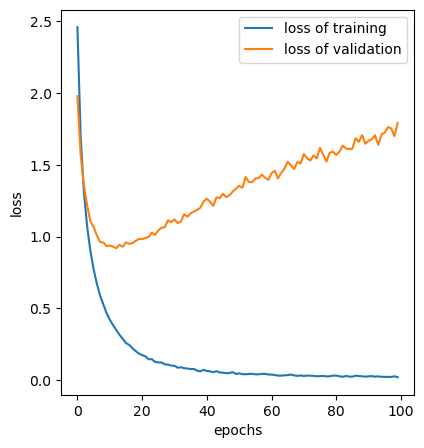

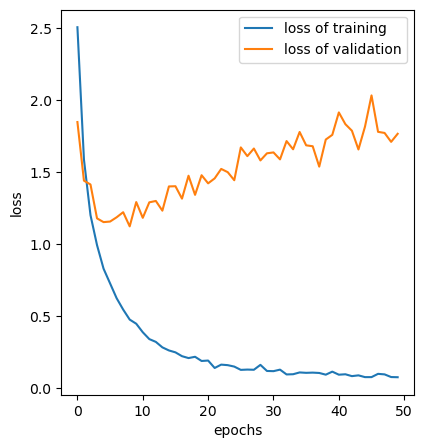

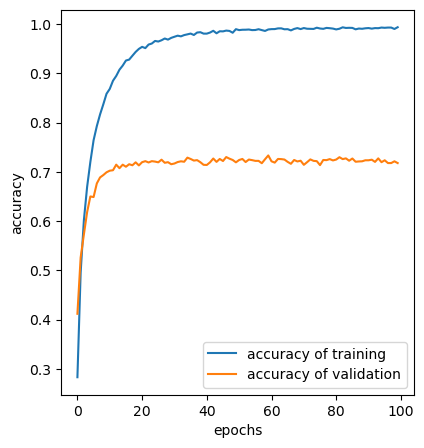

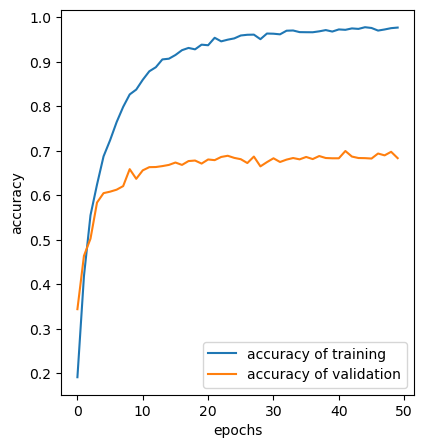

Model 1 saved as best_model.h5
INFO:tensorflow:Assets written to: m1\assets


INFO:tensorflow:Assets written to: m1\assets


105/105 [==============================] - 1s 9ms/step


C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score ,confusion_matrix, ConfusionMatrixDisplay ,classification_report
 
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
 
from sklearn.metrics import f1_score ,confusion_matrix
from sklearn.svm import SVC
 
# preprocessing
 
train_images = pd.read_csv("E:/FourthLevel\Machine Learning/Arabic-Characters-Recognition/csvTrainImages 13440x1024.csv", header=None)
train_labels = pd.read_csv("E:/FourthLevel\Machine Learning/Arabic-Characters-Recognition/csvTrainLabel 13440x1.csv", header=None)

test_images = pd.read_csv("E:/FourthLevel\Machine Learning/Arabic-Characters-Recognition/csvTestImages 3360x1024.csv", header=None)
test_labels = pd.read_csv("E:/FourthLevel\Machine Learning/Arabic-Characters-Recognition/csvTestLabel 3360x1.csv", header=None)

 
num_classes = len(train_labels[0].unique())
print("Number of unique classes:", num_classes)
 
class_distribution = train_labels[0].value_counts()
print("Class distribution:\n", class_distribution)
 
train_images = train_images / 255.0
test_images = test_images / 255.0
 
alphabet= ['0','أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']
 
def display_image(image_data):
    image = np.array(image_data).reshape(32, 32)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
 
num = 10
for i in range(num):
     display_image(train_images.iloc[i])
     print(alphabet[train_labels[0][i]])
 
 
# split the train data into train and validation
 
 
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)
 
#knn
 
k = [2, 3,4, 5, 6,7,8, 9, 11, 13, 15]
 
f1_scores = []
 
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.values, y_train.values)
    y_predict = knn.predict(X_val.values)
    f1 = f1_score(y_val.values, y_predict, average='weighted')
    f1_scores.append(f1)
 
# Plot the average f1 scores for each K value
plt.plot(k, f1_scores)
plt.xlabel('K Values')
plt.ylabel('Average F1 Score')
plt.title('Average F1 Scores for Different K Values')
plt.show()
 
best_k = k[np.argmax(f1_scores)]
print('Best K value:', best_k)
 
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train.values, y_train.values)
y_pre = knn_best.predict(test_images.values)
f1_score_knn = f1_score(test_labels.values, y_pre, average='weighted')
 
confusion_matrix_test = confusion_matrix(test_labels.values, y_pre)
graph, x = plt.subplots(figsize=(10, 10))
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_test)
confusion_matrix_display.plot(ax=x, cmap=plt.cm.Blues)
plt.show()
 
f1_score_test = f1_score(test_labels.values, y_pre, average='weighted')
print('Average F1 Score (Testing Set):', f1_score_test)
print('Confusion Matrix (Testing Set):\n', confusion_matrix_test)
 
print(f"Classification report \n\n:{classification_report(test_labels.values, y_pre)}")
 
 
#NN
#first model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(400, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(500, activation=tf.nn.relu))
 
# model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(300, activation=tf.nn.relu))
 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(29, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
m1 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
 
##second model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(400, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(500, activation=tf.nn.relu))
 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(29, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
 
#for validation
m2=model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=50)
 
 
 
# plt.figure(figsize=(10,5 ))
def plot_curves_loss(model, model_name):
 
    plt.figure(figsize=(10,5 ))
 
    plt.subplot(1, 2, 1)
    plt.plot(model.history['loss'], label='loss of training')
    plt.plot(model.history['val_loss'], label='loss of validation')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
 
 
def plot_curves_accuracy(model, model_name):
 
    plt.figure(figsize=(10,5 ))
    plt.subplot(1, 2, 2)
    plt.plot(model.history['accuracy'], label='accuracy of training')
    plt.plot(model.history['val_accuracy'], label='accuracy of validation')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
 
 
 
 
 
 
 
plot_curves_loss(m1, 'Model 1')
plot_curves_loss(m2, 'Model 2')
 
plot_curves_accuracy(m1, 'Model 1')
plot_curves_accuracy(m2, 'Model 2')
 
 
 
 
if m1.history['val_accuracy'][-1] > m2.history['val_accuracy'][-1]:
    best_model = m1
    model_name = 'Model 1'
else:
    best_model = m2
    model_name = 'Model 2'
 
# best_model.save('best_model.h5')
print(f'{model_name} saved as best_model.h5')
 
if best_model==m1:
    model.save('m1')
    model2_reload = tf.keras.models.load_model('m2')
    results = model2_reload.evaluate(test_images, test_labels)
    predictions = model2_reload.predict(test_images)
 
else:
    model.save('m2')
    model2_reload = tf.keras.models.load_model('m2')
    results = model2_reload.evaluate(test_images, test_labels)
    predictions = model2_reload.predict(test_images)
 
 
 
 
 
predict_label = np.argmax(model2_reload.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, predict_label)
conf_matrix
 
average_f1 = f1_score(test_labels, predict_label, average='weighted')
f1_score_nn = f1_score(test_labels.values, predict_label, average='weighted')
 
 
#SVM
 
SVM = SVC()
SVM.fit(train_images, train_labels.values.ravel())
y_pred = SVM.predict(test_images)
 
confusionMatrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:\n", conf_matrix)
 
f1_score_svm = f1_score(test_labels.values, y_pred, average='weighted')
print("Average F1 Score:", average_f1)
 
#Results

model = ['SVM', 'KNN', 'Neural Network']
f1_scores = [f1_score_svm, f1_score_knn, f1_score_nn]

 
best_model_index = np.argmax(f1_scores)
best_model = model[best_model_index]
best_f1 = f1_scores[best_model_index]
 
# Print the best model
print("F1 Scores:")
for i in range(len(model)):
    print(f"{model[i]}: {f1_scores[i]}")
 
print(f"\nBest Model: {best_model}")
print(f"Best Model F1 Score: {best_f1}")

